In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
loan_perf_2015=pd.read_csv("loan_perf_2015.csv")
loan_perf_2016=pd.read_csv("loan_perf_2016.csv")
loan_perf_2017=pd.read_csv("loan_perf_2017.csv")
loan_perf_2018=pd.read_csv("loan_perf_2018.csv")
loan_perf_2019=pd.read_csv("loan_perf_2019.csv")

/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,27,28,29,33,37,53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (27,28,29,33,37,53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (27,29,37,53) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
loan_perf_2015["Monthly Reporting Period"]=loan_perf_2015["Monthly Reporting Period"].astype(str)
loan_perf_2015["Postal Code"]=loan_perf_2015["Postal Code"].astype(int).astype(str)
loan_perf_2016["Monthly Reporting Period"]=loan_perf_2016["Monthly Reporting Period"].astype(str)
loan_perf_2016["Postal Code"]=loan_perf_2016["Postal Code"].astype(int).astype(str)
loan_perf_2017["Monthly Reporting Period"]=loan_perf_2017["Monthly Reporting Period"].astype(str)
loan_perf_2017["Postal Code"]=loan_perf_2017["Postal Code"].astype(int).astype(str)
loan_perf_2018["Monthly Reporting Period"]=loan_perf_2018["Monthly Reporting Period"].astype(str)
loan_perf_2018["Postal Code"]=loan_perf_2018["Postal Code"].astype(int).astype(str)
loan_perf_2019["Monthly Reporting Period"]=loan_perf_2019["Monthly Reporting Period"].astype(str)
loan_perf_2019["Postal Code"]=loan_perf_2019["Postal Code"].astype(int).astype(str)

In [4]:
loan_perf_2015["Payment"]=loan_perf_2015.groupby(["Loan Sequence Number"])["Current Actual UPB"].diff().fillna(0)*-1
loan_perf_2016["Payment"]=loan_perf_2016.groupby(["Loan Sequence Number"])["Current Actual UPB"].diff().fillna(0)*-1
loan_perf_2017["Payment"]=loan_perf_2016.groupby(["Loan Sequence Number"])["Current Actual UPB"].diff().fillna(0)*-1
loan_perf_2018["Payment"]=loan_perf_2016.groupby(["Loan Sequence Number"])["Current Actual UPB"].diff().fillna(0)*-1
loan_perf_2019["Payment"]=loan_perf_2016.groupby(["Loan Sequence Number"])["Current Actual UPB"].diff().fillna(0)*-1

In [5]:
payment_by_zipcode_2015=loan_perf_2015.groupby(["Postal Code", 'Monthly Reporting Period']).agg({"Payment":"mean"})
payment_by_zipcode_2016=loan_perf_2016.groupby(["Postal Code", 'Monthly Reporting Period']).agg({"Payment":"mean"})
payment_by_zipcode_2017=loan_perf_2017.groupby(["Postal Code", 'Monthly Reporting Period']).agg({"Payment":"mean"})
payment_by_zipcode_2018=loan_perf_2018.groupby(["Postal Code", 'Monthly Reporting Period']).agg({"Payment":"mean"})
payment_by_zipcode_2019=loan_perf_2019.groupby(["Postal Code", 'Monthly Reporting Period']).agg({"Payment":"mean"})

In [6]:
paymentsDF=pd.merge(payment_by_zipcode_2015,
         pd.merge(payment_by_zipcode_2016,
            pd.merge(payment_by_zipcode_2017,
                     pd.merge(payment_by_zipcode_2018,payment_by_zipcode_2019,
                     on=["Postal Code","Monthly Reporting Period"],how="left"),
            on=["Postal Code","Monthly Reporting Period"],how="left"),
        on=["Postal Code","Monthly Reporting Period"],how="left"),
    on=["Postal Code","Monthly Reporting Period"],how="left")
paymentsDF.columns=["2015","2016","2017","2018","2019"]
paymentsDF=paymentsDF.fillna(0)
paymentsDF["Total Payments"]=paymentsDF["2015"]+paymentsDF["2016"]+paymentsDF["2017"]+paymentsDF["2018"]+paymentsDF["2019"]

In [7]:
sf_ZRI=pd.read_csv("./freddie_mac/Zip_Zri_SingleFamilyResidenceRental.csv")
sf_ZRI.dropna(subset=["Metro"],inplace=True)
sf_ZRI_phoenix=sf_ZRI[sf_ZRI["Metro"].str.contains("Phoenix")]
sf_ZRI_phoenix.loc[:,'Postal Code']=[str(x)[:3]+"00" for x in sf_ZRI_phoenix["RegionName"]]
valueCols=[col for col in sf_ZRI_phoenix.columns if '20' in col] #columns with the indices
indexCols=[col for col in sf_ZRI_phoenix.columns if '20' not in col] #columns without the indices
sf_ZRI_phoenix_long=pd.melt(sf_ZRI_phoenix, id_vars=indexCols, value_vars=valueCols, var_name="Period",value_name="ZRI")
sf_ZRI_phoenix_long["Period"]=sf_ZRI_phoenix_long["Period"].str.replace("-","")
sf_ZRI_phoenix_long = sf_ZRI_phoenix_long.rename(columns={'zipcode':'Postal Code'})
zri_values=sf_ZRI_phoenix_long.groupby(["Postal Code","Period"]).agg({"ZRI":"mean"})

/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [8]:
paymentsDF=paymentsDF.reset_index()
zri_values=zri_values.reset_index()
finalPaymentDF=pd.merge(paymentsDF,zri_values,left_on=["Postal Code","Monthly Reporting Period"],right_on=["Postal Code","Period"])

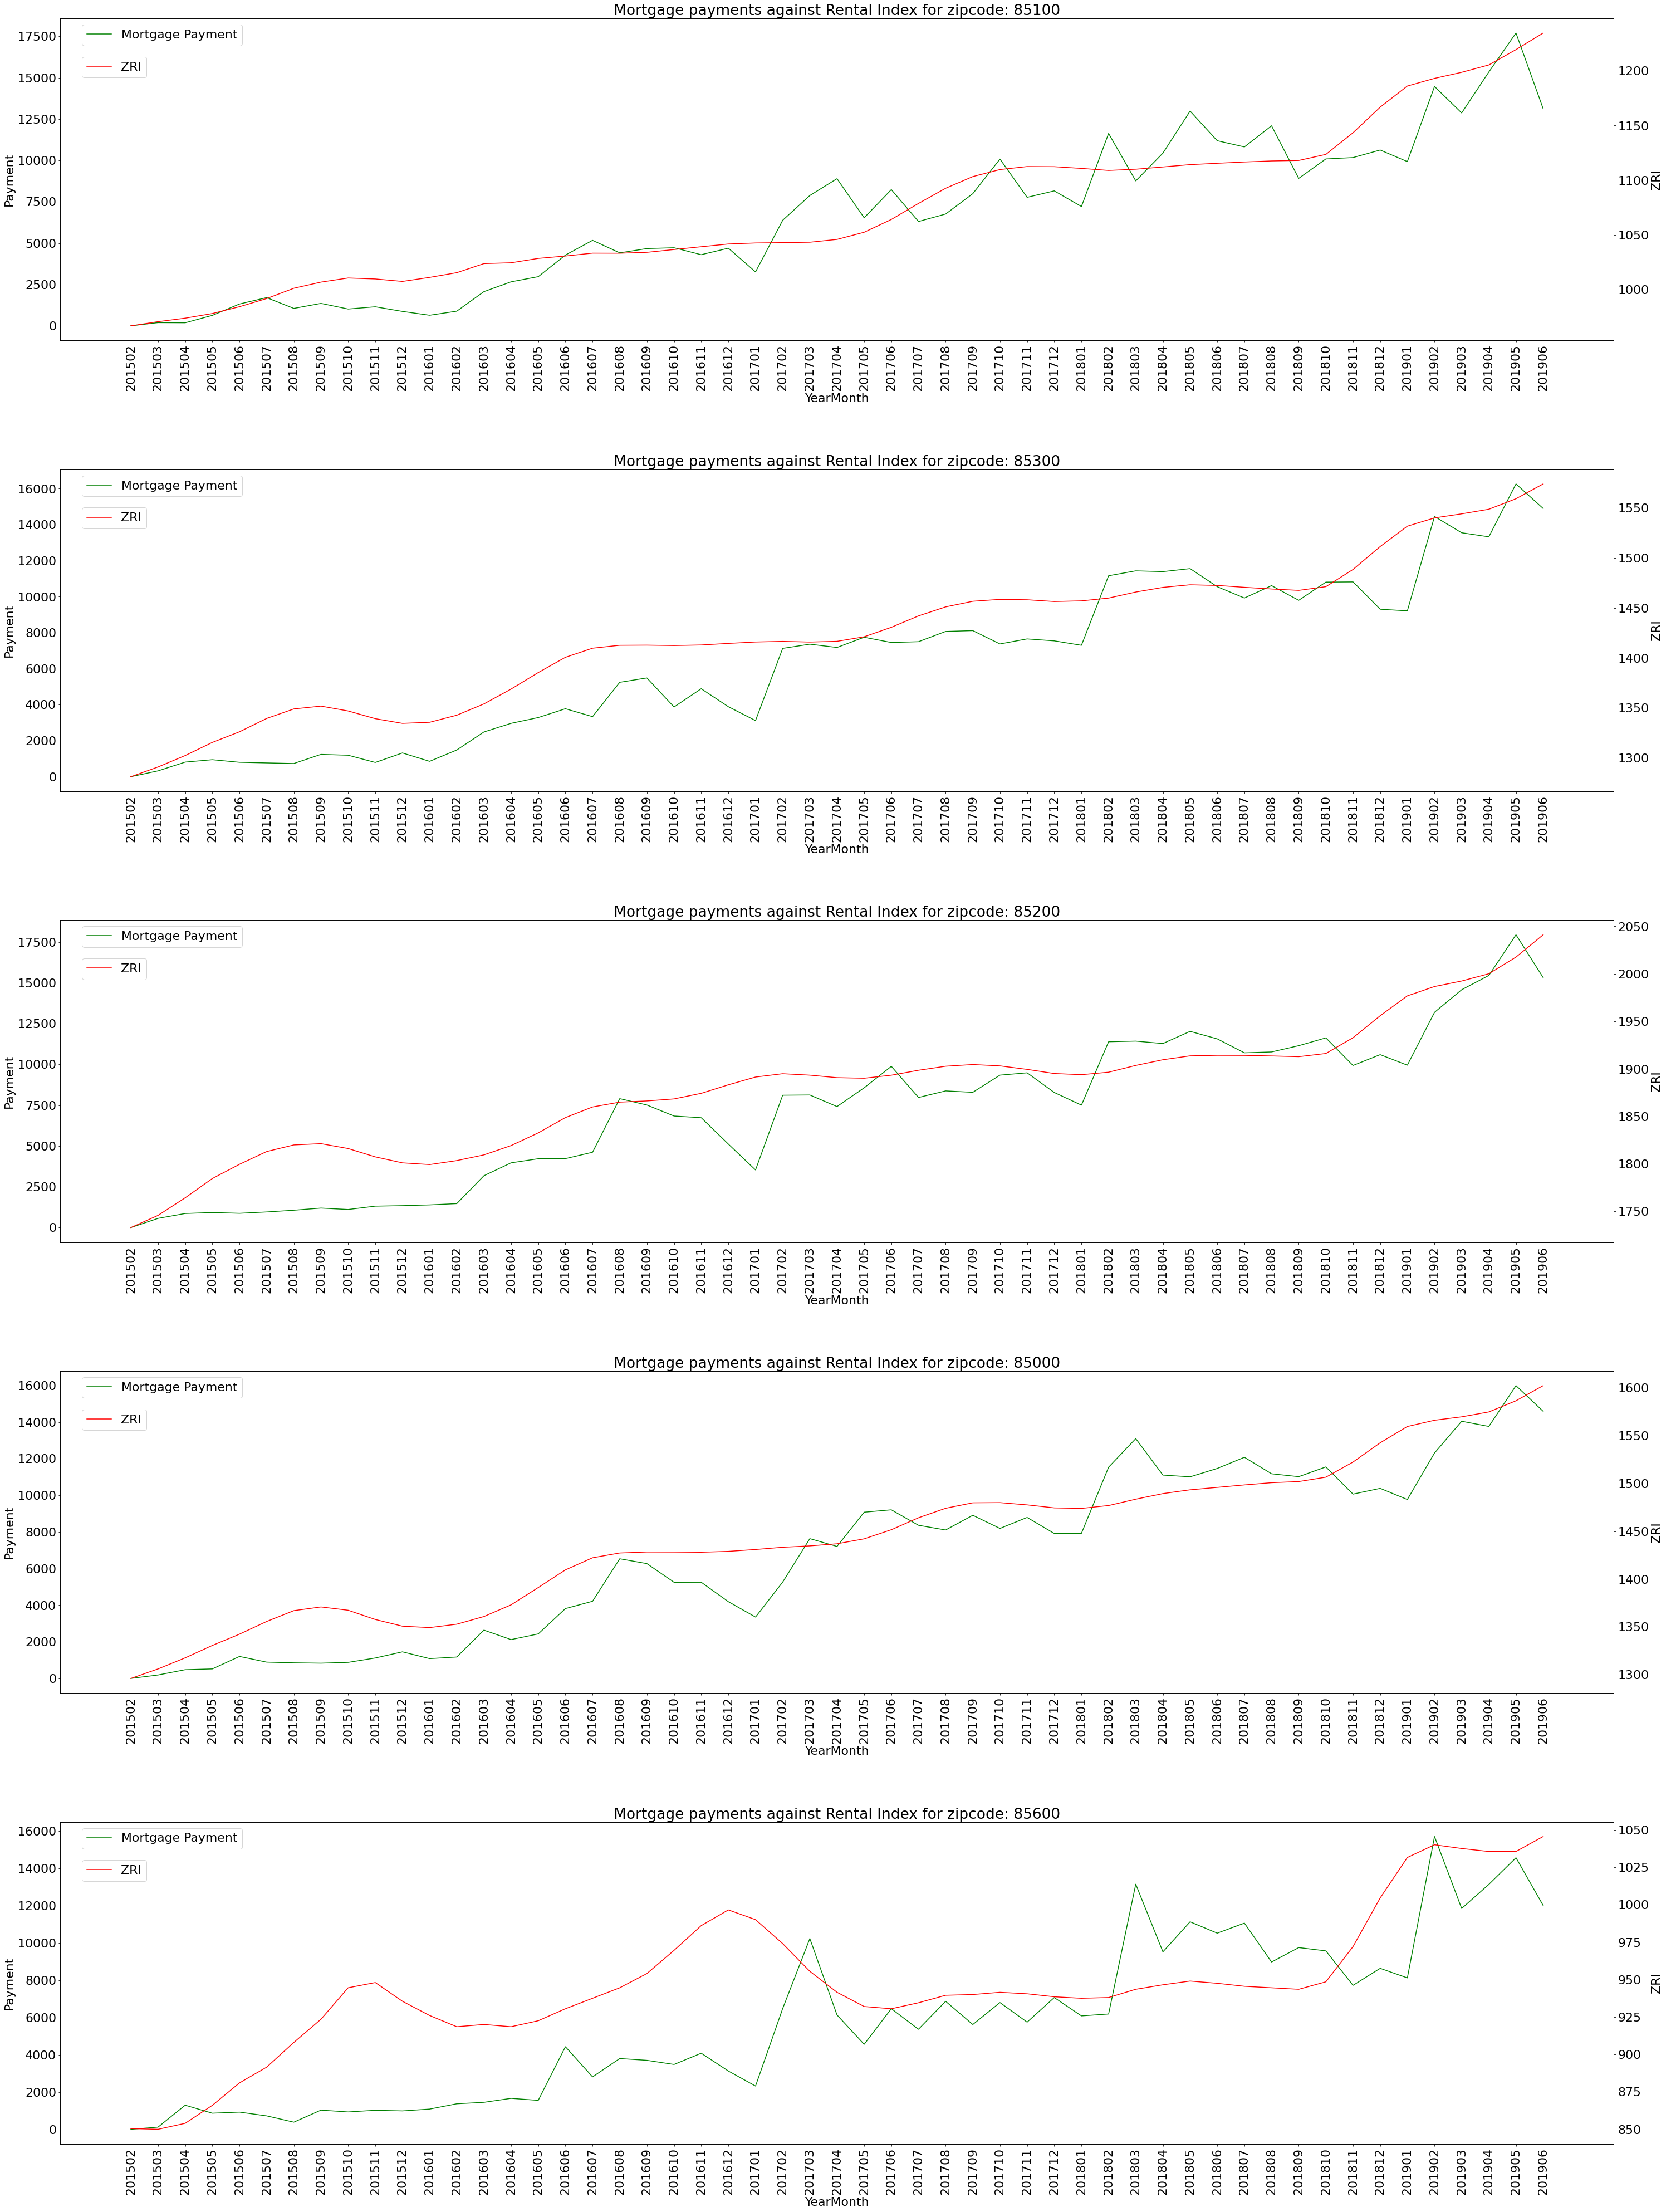

In [9]:
phoenix_postal_codes=[85100, 85300, 85200, 85000, 85700, 85600, 85500]
plt.figure(figsize=(50,100))  # change the size of figure!
i=0
plt.rcParams.update({'font.size': 22})
for zipcode in phoenix_postal_codes:
    df=finalPaymentDF[finalPaymentDF["Postal Code"]==str(zipcode)]
    if df.shape[0]>0:
        plt.subplot(7,1, i+1)     
        plt.plot(df["Period"].astype(str),df["Total Payments"],c="g",label="Mortgage Payment")
        plt.legend(loc="upper left", bbox_to_anchor=(0.01,1))
        plt.xticks(rotation=90)
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
        plt.title("Mortgage payments against Rental Index for zipcode: "+str(zipcode))
        plt.xlabel("YearMonth")
        plt.ylabel("Payment")
        plt.twinx()
        plt.plot(df["Period"].astype(str),df["ZRI"],c="r",label="ZRI")
        plt.ylabel("ZRI")
        plt.legend(loc="upper left", bbox_to_anchor=(0.01,0.9))

        i+=1  
        